# Feature Engieering Basic

In this notebook, we practice some basic algorithms to handle data in Machine Learning (ML)

## 1. Handling categorical Data

Two methods:

1. Create dummy variable
2. Convert to number

### 1. Create dummy variable

In [1]:
import pandas as pd
from patsy import dmatrices

In [2]:
df = pd.DataFrame({'A':['high','medium','low'],
                  'B': [10, 20, 30]},
                 index=[0,1,2])
print(df)

        A   B
0    high  10
1  medium  20
2     low  30


#### Using get_dummies() function of pandas package

In [3]:
df_with_dummies = pd.get_dummies(data=df, prefix='A', columns=['A'])
print(df_with_dummies)

    B  A_high  A_low  A_medium
0  10       1      0         0
1  20       0      0         1
2  30       0      1         0


This example explains why in high dimension of dataset (in form of DataFrame) we usually get the **Memory Overflow Error**

In [23]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# ohe.fit(X)
# df_transformed = ohe.transform(df)
# print(df_transformed.toarray())

### 2. Convert to number

This method is used to convert categorical variable to numerics

In [7]:
# Continue doing test with the previous dataframe

# Using pandas package's factorize function
df['A_pd_factorized'] = pd.factorize(df['A'])[0]

# Alternatively you can use sklearn package's LabelEncoder function
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['A_LabelEncoded'] = le.fit_transform(df.A)

print(df)

        A   B  A_pd_factorized  A_LabelEncoded
0    high  10                0               0
1  medium  20                1               2
2     low  30                2               1


As shown in above result, we got the same encoding of categorical data (column A)

## Normalizing data

Two broadly methods are used:
1. Normalization
2. Standardization

### 1. Normalization

Use MinMaxScaller from sklearn to do this task.

In [12]:
df_copy = df.copy()
df_copy = df_copy.drop(axis=1, labels='A')
print(df_copy)

    B  A_pd_factorized  A_LabelEncoded
0  10                0               0
1  20                1               2
2  30                2               1


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_copy_fited = scaler.fit_transform(df_copy)
print(df_copy_fited)

[[ 0.   0.   0. ]
 [ 0.5  0.5  1. ]
 [ 1.   1.   0.5]]


### 2. Standardization

In this example, we combine both normalization and Standardization together to increase effect.

In [33]:
from sklearn import datasets
import numpy as np
from sklearn import preprocessing

iris = datasets.load_iris()
print('First 5 rows of data: \n',iris.data[0:5])
print('Feature names:\n',iris.feature_names)
# the result should be: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# We take petal length and petal width for testing
X = iris.data[:, [2,3]] #[:10]
y = iris.target # [:10]

print(X[0:5])
print(y[0:5])

First 5 rows of data: 
 [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 1.4  0.2]
 [ 1.4  0.2]
 [ 1.3  0.2]
 [ 1.5  0.2]
 [ 1.4  0.2]]
[0 0 0 0 0]


In [37]:
print('Standardization')
std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)
print(X_std[:5])
print('Mean before standardization: petal length={:.1f}, petal width={:.1f}'.format(X[:,0].mean(), X[:,1].mean()))
print('SD before standardization: petal length={:.1f}, petal width={:.1f}'.format(X[:,0].std(), X[:,1].std()))

print('Mean after standardization: petal length={:.1f}, petal width={:.1f}'.format(X_std[:,0].mean(), X_std[:,1].mean()))
print('SD after standardization: petal length={:.1f}, petal width={:.1f}'.format(X_std[:,0].std(), X_std[:,1].std()))

print('Normalization')
minmax_scal = scaler.fit(X)
X_minmax = minmax_scal.transform(X)
print(X_minmax[:5])
print('\nMin value before min-max scaling: patel length={:.1f}, patel width={:.1f}'.format(X[:,0].min(), X[:,1].min()))
print('Max value before min-max scaling: petal length={:.1f}, petal width={:.1f}'.format(X[:,0].max(), X[:,1].max()))
print('Min value after min-max scaling: patel length={:.1f}, patel width={:.1f}'.format(X_minmax[:,0].min(), X_minmax[:,1].min()))
print('Max value after min-max scaling: petal length={:.1f}, petal width={:.1f}'.format(X_minmax[:,0].max(), X_minmax[:,1].max()))

Standardization
[[-1.3412724  -1.31297673]
 [-1.3412724  -1.31297673]
 [-1.39813811 -1.31297673]
 [-1.2844067  -1.31297673]
 [-1.3412724  -1.31297673]]
Mean before standardization: petal length=3.8, petal width=1.2
SD before standardization: petal length=1.8, petal width=0.8
Mean after standardization: petal length=0.0, petal width=-0.0
SD after standardization: petal length=1.0, petal width=1.0
Normalization
[[ 0.06779661  0.04166667]
 [ 0.06779661  0.04166667]
 [ 0.05084746  0.04166667]
 [ 0.08474576  0.04166667]
 [ 0.06779661  0.04166667]]

Min value before min-max scaling: patel length=1.0, patel width=0.1
Max value before min-max scaling: petal length=6.9, petal width=2.5
Min value after min-max scaling: patel length=0.0, patel width=0.0
Max value after min-max scaling: petal length=1.0, petal width=1.0


## PCA Example


Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.93035378  0.92740362  0.14834223  0.02074601]
Cummulative Variance Explained [72.770452093801353, 23.030523267680632, 3.6838319576273828, 0.51519268089063464]


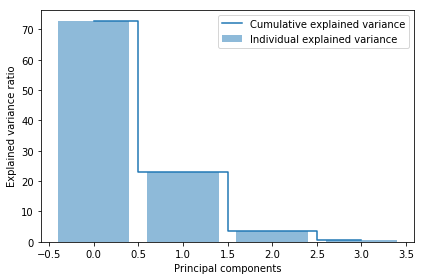

In [42]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

# standardize data
X_std = StandardScaler().fit_transform(X)

# create covariance matrix 
cov_mat = np.cov(X_std.T)
print('Covariance matrix \n%s' %cov_mat)
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
print('Eigenvectors \n%s' %eig_vecs) 
print('\nEigenvalues \n%s' %eig_vals)

# sort eigenvalues in decreasing order
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range (len(eig_vals))]
tot = sum(eig_vals)
cum_var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] 
print("Cummulative Variance Explained", cum_var_exp)

plt.figure(figsize=(6, 4))
plt.bar(range(4), var_exp, alpha=0.5, align='center', label='Individual explained variance') 
plt.step(range(4), cum_var_exp, where='mid',label='Cumulative explained variance') 
plt.ylabel('Explained variance ratio') 
plt.xlabel('Principal components') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()
